# All Football Players Stats in Top 5 Leagues 23/24
This dataset contains detailed data on all footballers in the 23/24 top 5 league


England - Premier League
 
Spain - Laliga

Germany - Bundeshliga

Italy - Seria A

France league one

# Import data set

In [29]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
import seaborn as sns

In [2]:
file_path= 'C:/Users/Yohan/Documents/mindam/top5-players.csv'
df=pd.read_csv(file_path)

In [3]:
df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23.0,2000.0,20,13,...,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22.0,2000.0,30,14,...,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19.0,2003.0,7,1,...,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17.0,2006.0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35.0,1987.0,31,31,...,0.13,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,2848,Lovro Zvonarek,hr CRO,"FW,MF",Bayern Munich,de Bundesliga,18.0,2005.0,5,1,...,0.55,0.00,0.55,0.55,0.55,0.04,0.12,0.15,0.04,0.15
2848,2849,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,24.0,1998.0,35,35,...,0.23,0.29,0.52,0.17,0.47,0.22,0.28,0.50,0.17,0.45
2849,2850,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,33.0,1990.0,20,13,...,0.37,0.07,0.45,0.30,0.37,0.34,0.09,0.43,0.16,0.25
2850,2851,Milan Đurić,ba BIH,FW,Monza,it Serie A,33.0,1990.0,17,13,...,0.29,0.07,0.36,0.29,0.36,0.21,0.05,0.26,0.21,0.26


# Data set description

Player: The name of the player.

Nation: The player's nationality.

Pos: The player's position (e.g., forward, midfielder, defender).

Age: The player's age.

MP (Minutes Played): Total minutes played by the player.

Starts: Number of matches the player started.

Min (Minutes): Total minutes played by the player (this might be the same as MP).

90s (90s Played): The equivalent of 90-minute matches played by the player (e.g., 1.5 = 135 minutes).

Gls (Goals): Total number of goals scored by the player.

Ast (Assists): Total number of assists made by the player.

G+A (Goals + Assists): Total number of goals and assists combined.

G-PK (Goals - Penalty Kicks): Total number of goals scored excluding penalty kicks.

PK (Penalty Kicks): Number of penalty goals scored by the player.

PKatt (Penalty Kicks Attempted): Number of penalty kicks attempted by the player.

CrdY (Yellow Cards): Number of yellow cards received by the player.

CrdR (Red Cards): Number of red cards received by the player.

xG (Expected Goals): The expected number of goals from the player's shots.

npxG (Non-Penalty Expected Goals): Expected goals excluding penalties from the player's shots.

xAG (Expected Assists): The expected number of assists from the player's passes.

npxG+xAG (Non-Penalty xG + xAG): Total of non-penalty expected goals and expected assists from the player's shots.

PrgC (Progressive Carries): Number of times the player carried the ball forward.

PrgP (Progressive Passes): Number of passes made by the player that moved the ball forward.

PrgR (Progressive Runs): Number of times the player made runs forward with the ball.

Gls_90 : Total number of goals scored per 90 minutes.

Ast_90(Assists):  Total number of assists made per 90 minutes.

G+A_90 (Goals + Assists): Total number of goals and assists combined per 90 minutes.

G-PK_90 (Goals - Penalty Kicks): Goals scored excluding penalty kicks per 90 minutes.

G+A-PK_90 (Goals + Assists - Penalty Kicks): Total goals and assists minus penalty goals per 90 minutes.

xG_90 (Expected Goals):  Expected number of goals from the player's shots per 90 minutes.

xAG_90 (Expected Assists): Expected number of assists from the player's passes per 90 minutes.

xG+xAG_90 (Expected Goals + Expected Assists): Total expected goals and assists per 90 minutes.

npxG_90 (Non-Penalty Expected Goals): Expected goals excluding penalties per 90 minutes.

npxG+xAG_90 (Non-Penalty xG + Expected Assists): Total of non-penalty expected goals and expected assists per 90 minutes.

# Data Preprocesing

# check missing values

In [4]:
df.isnull().sum()

Rk             0
Player         0
Nation         3
Pos            0
Squad          0
Comp           0
Age            4
Born           4
MP             0
Starts         0
Min            0
90s            0
Gls            0
Ast            0
G+A            0
G-PK           0
PK             0
PKatt          0
CrdY           0
CrdR           0
xG             1
npxG           1
xAG            1
npxG+xAG       1
PrgC           1
PrgP           1
PrgR           1
Gls_90         0
Ast_90         0
G+A_90         0
G-PK_90        0
G+A-PK_90      0
xG_90          1
xAG_90         1
xG+xAG_90      1
npxG_90        1
npxG+xAG_90    1
dtype: int64

In [5]:
columns_to_replace = [
    'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 
    'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls_90', 'Ast_90', 'G+A_90', 
    'G-PK_90', 'G+A-PK_90', 'xG_90', 'xAG_90', 'xG+xAG_90', 'npxG_90', 'npxG+xAG_90'
]

# Replace null values with 0 in the specified columns
df[columns_to_replace] = df[columns_to_replace].fillna(0)



In [6]:
columns_to_replace_mode = ['Nation', 'Age', 'Born']

# Replace null values with the mode of each column
for column in columns_to_replace_mode:
    mode_value = df[column].mode()[0]  # Get the mode (most frequent value)
    df[column].fillna(mode_value, inplace=True)


C:\Users\Yohan\AppData\Local\Temp\ipykernel_12708\3367939158.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)


In [7]:
df.isnull().sum()

Rk             0
Player         0
Nation         0
Pos            0
Squad          0
Comp           0
Age            0
Born           0
MP             0
Starts         0
Min            0
90s            0
Gls            0
Ast            0
G+A            0
G-PK           0
PK             0
PKatt          0
CrdY           0
CrdR           0
xG             0
npxG           0
xAG            0
npxG+xAG       0
PrgC           0
PrgP           0
PrgR           0
Gls_90         0
Ast_90         0
G+A_90         0
G-PK_90        0
G+A-PK_90      0
xG_90          0
xAG_90         0
xG+xAG_90      0
npxG_90        0
npxG+xAG_90    0
dtype: int64

# Check players who have played for two clubs in 23/24 season

In [8]:
player_counts = df['Player'].value_counts()
players_with_two_occurrences = player_counts[player_counts == 2]
players_with_two_occurrences

Player
Roberto Piccoli      2
Juan Cruz            2
Carlos Baleba        2
Mahmoud Dahoud       2
Matteo Gabbia        2
                    ..
Nemanja Radonjić     2
Shon Weissman        2
Nicolás Domínguez    2
Elif Elmas           2
Alessio Zerbin       2
Name: count, Length: 147, dtype: int64

# clean the comp colunm

In [9]:
df['Comp'] = df['Comp'].str.split(' ').str[1:].str.join(' ')


# clean the Nation colunm

In [10]:
df['Nation'] = df['Nation'].str.split(' ').str[1]


In [11]:
df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Max Aarons,ENG,DF,Bournemouth,Premier League,23.0,2000.0,20,13,...,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06
1,2,Brenden Aaronson,USA,"MF,FW",Union Berlin,Bundesliga,22.0,2000.0,30,14,...,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
2,3,Paxten Aaronson,USA,MF,Eint Frankfurt,Bundesliga,19.0,2003.0,7,1,...,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
3,4,Keyliane Abdallah,FRA,FW,Marseille,Ligue 1,17.0,2006.0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35.0,1987.0,31,31,...,0.13,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,2848,Lovro Zvonarek,CRO,"FW,MF",Bayern Munich,Bundesliga,18.0,2005.0,5,1,...,0.55,0.00,0.55,0.55,0.55,0.04,0.12,0.15,0.04,0.15
2848,2849,Martin Ødegaard,NOR,MF,Arsenal,Premier League,24.0,1998.0,35,35,...,0.23,0.29,0.52,0.17,0.47,0.22,0.28,0.50,0.17,0.45
2849,2850,Milan Đurić,BIH,FW,Hellas Verona,Serie A,33.0,1990.0,20,13,...,0.37,0.07,0.45,0.30,0.37,0.34,0.09,0.43,0.16,0.25
2850,2851,Milan Đurić,BIH,FW,Monza,Serie A,33.0,1990.0,17,13,...,0.29,0.07,0.36,0.29,0.36,0.21,0.05,0.26,0.21,0.26


# Split the Position colunm

In [12]:
df[['Pos1', 'Pos2']] = df['Pos'].str.split(',', expand=True)
df.drop(columns=['Pos'], inplace=True)

# Remove duplicate rows

In [13]:
duplicates_df = df[df.duplicated(keep=False)] # Identify duplicate rows

df = df.drop_duplicates() # Remove duplicates from the original DataFrame

df.reset_index(drop=True, inplace=True)
duplicates_df.reset_index(drop=True, inplace=True)


# Save the dataframe

In [14]:
df.to_csv('cleaned_data.csv', index=False)

# Remove unnecessary  colunms

In [15]:
columns_to_keep = [
    'Pos1', 'Comp', 'Age', 'MP', 'Starts', 'Min', 
    'Gls', 'Ast', 'PK', 'PKatt', 'CrdY', 'CrdR', 
    'xG', 'npxG', 'xAG', 'PrgC', 'PrgP', 'PrgR'
]

# Create the subset DataFrame
df1 = df[columns_to_keep]

# Handle categorical colunms

In [16]:
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform the categorical columns
encoded_features = encoder.fit_transform(df1[['Pos1', 'Comp']])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Pos1', 'Comp']))

# Concatenate the encoded columns back to the original DataFrame
df1 = pd.concat([df1.drop(['Pos1', 'Comp'], axis=1), encoded_df], axis=1)


# standardization

In [17]:
columns_to_standardize = [
    'Age', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'PK', 'PKatt', 
    'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'PrgC', 'PrgP', 'PrgR'
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the specified columns
df1[columns_to_standardize] = scaler.fit_transform(df1[columns_to_standardize])

# K-mean clustering

In [18]:
n_clusters = 4  # You can choose the number of clusters based on your needs or using methods like the Elbow method

# Initialize the KMeans algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the KMeans algorithm to the data
df1['Cluster'] = kmeans.fit_predict(df1)

# Display the first few rows of the DataFrame with cluster labels


In [19]:
df1['Cluster'].value_counts()

Cluster
0    1314
3    1104
1     370
2      64
Name: count, dtype: int64

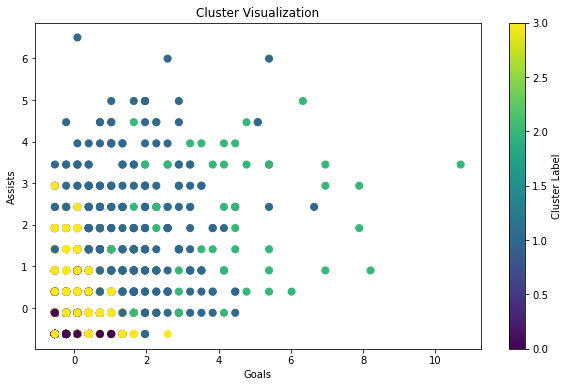

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['Gls'], df1['Ast'], c=df1['Cluster'], cmap='viridis', s=50)
plt.xlabel('Goals')
plt.ylabel('Assists')
plt.title('Cluster Visualization')
plt.colorbar(label='Cluster Label')
plt.show()

# Check best number of clusters

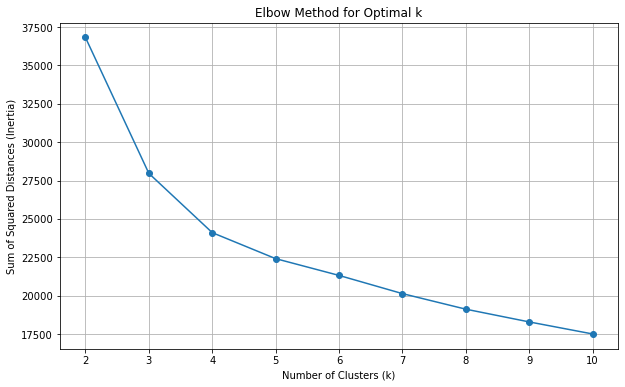

In [26]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Initialize a list to store the sum of squared distances
sse = []

# Define the range of k values
k_range = range(2, 11)  # Adjust this range if needed

for k in k_range:
    try:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df1)  # df1 should be your standardized and encoded DataFrame
        sse.append(kmeans.inertia_)
    except Exception as e:
        print(f"Error with k={k}: {e}")
        sse.append(None)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)  # Ensure x-axis ticks match the k values
plt.grid(True)
plt.show()


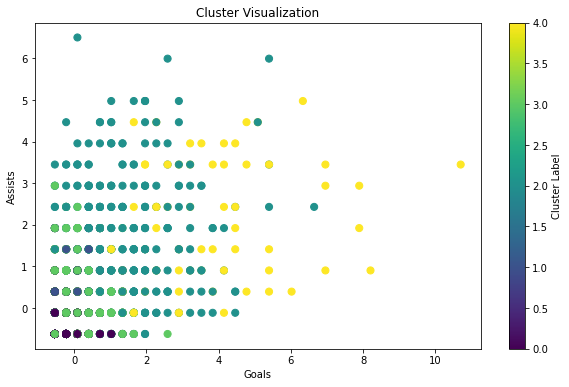

In [27]:
n_clusters = 5  # You can choose the number of clusters based on your needs or using methods like the Elbow method

# Initialize the KMeans algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the KMeans algorithm to the data
df1['Cluster'] = kmeans.fit_predict(df1)

plt.figure(figsize=(10, 6))
plt.scatter(df1['Gls'], df1['Ast'], c=df1['Cluster'], cmap='viridis', s=50)
plt.xlabel('Goals')
plt.ylabel('Assists')
plt.title('Cluster Visualization')
plt.colorbar(label='Cluster Label')
plt.show()


# Hierarchical Clustering

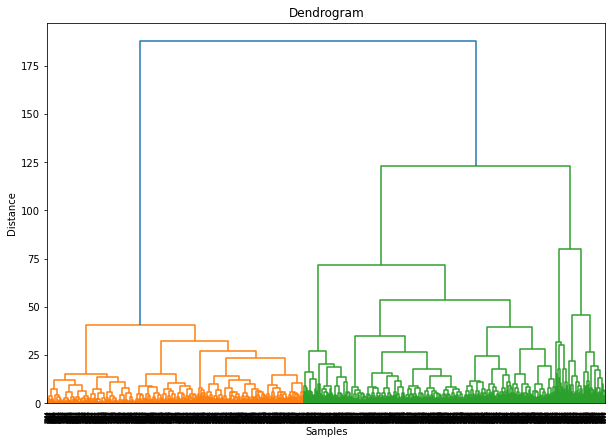

In [30]:
linkage_matrix = sch.linkage(df1, method='ward')  # 'ward' minimizes the variance of clusters

# Plot the Dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()